In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
### 设置不使用科学计数法
np.set_printoptions(precision=3, suppress=True)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
# %matplotlib tk
# %matplotlib inline

# 更改颜色空间

In [5]:
# 获取所有的颜色通道(以COLOR_开头的属性)
# 在OpenCV中HSV颜色空间的取值范围为：H->[0,179], S->[0,255], V->[0,255]; 其它图像处理软件不一样
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print("总颜色转换方式:{}".format(len(flags)))
print(flags)

总颜色转换方式:374
['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_V

In [6]:
# 转换颜色空间
# 加载数据
img = cv.imread('xiaoren.png')

# 将图像转换为灰度图像
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 图像可视化
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
# 转换颜色空间
# 加载数据
img = cv.imread('opencv-logo.jpg')

# 转换为HSV格式
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# 图像可视化
cv.imshow('image', hsv)  # 展示的时候，是以bgr或者gray的格式进行展示的
cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
# 转换颜色空间
# 加载数据
img = cv.imread('xiaoren.png')

# 转换为HSV格式
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# 定义像素点范围
# # 蓝色的范围
# lower = np.array([100,50,50])
# upper = np.array([130,255,255])
# 黄色的范围
lower = np.array([26,50,50])
upper = np.array([34,255,255])

# 在这个范围的图像像素设置为255，不在这个范围的设置为0
mask = cv.inRange(hsv, lower, upper)

# 进行And操作进行数据合并
dst = cv.bitwise_and(img,img, mask= mask)

# 图像可视化
cv.imshow('hsv', hsv)
# cv.imshow('mask', mask)
# cv.imshow('image', img)
# cv.imshow("dest", dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [9]:
# 转换颜色空间
# 加载数据
img = cv.imread('opencv-logo.png')

# 转换为HSV格式
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# 定义像素点范围
# # 蓝色的范围
# lower = np.array([100,50,50])
# upper = np.array([130,255,255])
# 红色的范围
lower = np.array([150,50,50])
upper = np.array([200,255,255])
mask1 = cv.inRange(hsv, lower, upper)
# 绿色的范围
lower = np.array([30,50,50])
upper = np.array([80,255,255])
mask2 = cv.inRange(hsv, lower, upper)

mask = cv.add(mask1, mask2)

# 进行And操作进行数据合并
dst = cv.bitwise_and(img,img, mask= mask)

# 图像可视化
# cv.imshow('hsv', hsv)
# cv.imshow('mask', mask)
# cv.imshow('image', img)
cv.imshow("dest", dst)
cv.waitKey(0)
cv.destroyAllWindows()

# 大小重置

In [10]:
# 加载图像
img = cv.imread("xiaoren.png")

In [11]:
old_height, old_width, _ = img.shape
print("旧图像的大小, 高度={}, 宽度:{}".format(old_height, old_width))
new_height = int(0.8 * old_height)
new_width = 250
print("新图像的大小, 高度={}, 宽度:{}".format(new_height, new_width))
dst = cv.resize(img, (new_width, new_height))
print(dst.shape)

# 图像可视化
cv.imshow('mask', dst)
cv.waitKey(0)
cv.destroyAllWindows()

旧图像的大小, 高度=600, 宽度:510
新图像的大小, 高度=480, 宽度:250
(480, 250, 3)


# 图像平移

In [12]:
# 加载图像
img = cv.imread("xiaoren.png")
img = cv.resize(img, (300, 300))

In [13]:
# 构建一个M
M = np.float32([
    [1, 0, -10], 
    [0, 1, 60]
])
# warpAffine计算规则：src(x,y)=dst(m11*x+m12*y+m13, m21*x+m22*y+m23)
# x和y是坐标点
dst = cv.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 图像可视化
cv.imshow('mask', dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [14]:
# 构建一个M
# M = np.float32([
#     [0.8, 0.15, 0], 
#     [0.53, 1, 0]
# ])

theta = 10*np.pi/180
M = np.float32([
    [0.5*np.cos(theta), -np.sin(theta), 10], 
    [np.sin(theta), 0.7*np.cos(theta), 10]
])

# warpAffine计算规则：src(x,y)=dst(m11*x+m12*y+m13, m21*x+m22*y+m23)
# x和y是坐标点
dst = cv.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 图像可视化
cv.imshow('mask', dst)
cv.waitKey(0)
cv.destroyAllWindows()

# 图像旋转和缩放

In [15]:
# 加载图像
img = cv.imread("xiaoren.png")
rows, cols, _ = img.shape

In [16]:
# 构建一个用于旋转的M(旋转的中心点，旋转大小，尺度)
# angle:负数表示顺时针选择
M = cv.getRotationMatrix2D(center=(cols/2, rows/2), angle=45, scale=1)
# M = cv.getRotationMatrix2D(center=(0, 0), angle=-20, scale=0.5)
print(M)
# M = cv.getRotationMatrix2D(center=(cols/2, rows/2), angle=90, scale=1)
# warpAffine计算规则：src(x,y)=dst(m11*x+m12*y+m13, m21*x+m22*y+m23)
dst1 = cv.warpAffine(img, M, (cols, rows), borderValue=[255,0,0])

# M = cv.getRotationMatrix2D(center=(cols/2, rows/2), angle=20, scale=1)
# # print(M)
# dst = cv.warpAffine(img, M, (cols, rows), borderValue=[0,0,200])
# print(dst.shape)

# # 图像可视化
# cv.imshow('dst', dst)
cv.imshow('dst1', dst1)
cv.waitKey(0)
cv.destroyAllWindows()

[[   0.707    0.707 -137.444]
 [  -0.707    0.707  268.18 ]]


In [17]:
# 90、180、270度旋转
# 顺时针旋转90度
# dst = cv.rotate(img, rotateCode=cv.ROTATE_90_CLOCKWISE)
# 旋转180度
# dst = cv.rotate(img, rotateCode=cv.ROTATE_180)
# 逆时针旋转90度
# dst = cv.rotate(img, rotateCode=cv.ROTATE_90_COUNTERCLOCKWISE)
print(dst.shape)
# 图像可视化
cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

(300, 300, 3)


In [18]:
# 水平或者垂直翻转
dst0 = cv.flip(img, 0)  # 上下翻转
dst1 = cv.flip(img, 1)  # 左右翻转
print(dst.shape)
# 图像可视化
cv.imshow('dst0', dst0)
cv.imshow('dst1', dst1)
cv.waitKey(0)
cv.destroyAllWindows()

(300, 300, 3)


In [19]:
img = np.array(range(25)).reshape((5,5))
print(img)
print(cv.flip(img, 1))
print(img[:, ::-1])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 4  3  2  1  0]
 [ 9  8  7  6  5]
 [14 13 12 11 10]
 [19 18 17 16 15]
 [24 23 22 21 20]]
[[ 4  3  2  1  0]
 [ 9  8  7  6  5]
 [14 13 12 11 10]
 [19 18 17 16 15]
 [24 23 22 21 20]]


In [20]:
# 图像旋转变成水平一点
img = cv.imread("car3_plat.jpg")
h,w,_ = img.shape

M = cv.getRotationMatrix2D(center=(0, 0), angle=20, scale=1)
dst = cv.warpAffine(img, M, (w+30,h//2), borderValue=[0,100,0])

cv.imshow('img', img)
cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

# cv.imwrite('car3_plat2.png', dst)

# 仿射变换矩阵的另一种构造方法

在仿射变换中，原图中是平行的元素在新的图像中也是平行的元素；可以任意的给定三对点来构建

In [21]:
# 加载图像
img = cv.imread("xiaoren.png")
rows, cols, _ = img.shape

# 画4条直线
cv.line(img, pt1=(0,rows//3), pt2=(cols,rows//3), color=(255,0,0), thickness=2)
cv.line(img, pt1=(0,2*rows//3), pt2=(cols,2*rows//3), color=(255,0,0), thickness=2)
cv.line(img, pt1=(cols//3,0), pt2=(cols//3,rows), color=(255,0,0), thickness=2)
cv.line(img, pt1=(2*cols//3,0), pt2=(2*cols//3,rows), color=(255,0,0), thickness=2)
cv.imshow('img', img)
cv.waitKey(0)
cv.destroyAllWindows()

[[   1.056    0.45  -259.444]
 [   0.       1.25  -200.   ]]


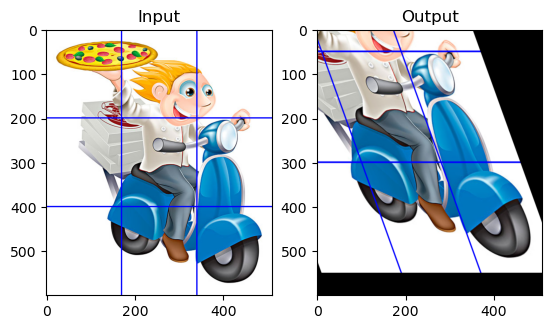

In [22]:
# 分布在原始图像中选择三个点以及这三个点在新图像中的位置
pts1 = np.float32([[170,200], [350,200], [170,400]])
pts2 = np.float32([[10,50], [200,50], [100,300]])
# 构建对应的M
M = cv.getAffineTransform(pts1,pts2)
print(M)

# 进行转换
dst = cv.warpAffine(img,M,(cols,rows))

# 可视化画图
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Input')
plt.subplot(122)
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.title('Output')
plt.show()

[[  1.069   0.263 -13.208]
 [ -0.301   0.827   6.624]]


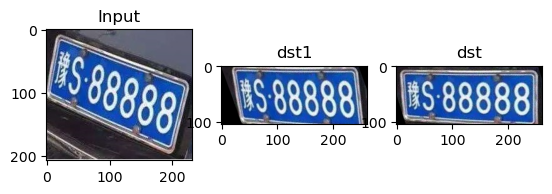

In [23]:
img = cv.imread("car3_plat.jpg")
h,w,_ = img.shape

M = cv.getRotationMatrix2D(center=(0, 0), angle=20, scale=1)
dst1 = cv.warpAffine(img, M, (w+30, h // 2), borderValue=[0,0,0])
h,w,_ = dst1.shape

pts1 = np.float32([[19,11],[225,86],[198,196]])
pts2 = np.float32([[10,10],[250,10],[250,240*200/440]])


# 分布在原始图像中选择三个点以及这三个点在新图像中的位置
# pts1 = np.float32([[20,12], [225,88], [195,197]])
# pts2 = np.float32([[0,0], [250,0], [250,140*250/440]])
# 构建对应的M
M = cv.getAffineTransform(pts1,pts2)
print(M)
# 进行转换
dst = cv.warpAffine(img,M,(w,h))

# 可视化画图
plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Input')
plt.subplot(132)
plt.imshow(cv.cvtColor(dst1, cv.COLOR_BGR2RGB))
plt.title('dst1')
plt.subplot(133)
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.title('dst')
plt.show()

In [24]:
print(140*250/440)

79.54545454545455


# 透视转换
实际上就是根据给定的四个点来进行转换操作，在转换过程中图像的形状不会发现变化，也就是原来是直线的，转换后还是直线，要求这四个点中任意三个点均不在同一线上<br/>

In [25]:
# 加载图像
img = cv.imread("xiaoren.png")
rows, cols, _ = img.shape

# 画两条线
cv.line(img, pt1=(0,rows//2), pt2=(cols,rows//2), color=(255,0,0), thickness=5)
cv.line(img, pt1=(cols//2,0), pt2=(cols//2,rows), color=(255,0,0), thickness=5)
print("")

[[  1.395   0.258 -19.12 ]
 [ -0.236   0.681   7.217]
 [  0.001  -0.      1.   ]]


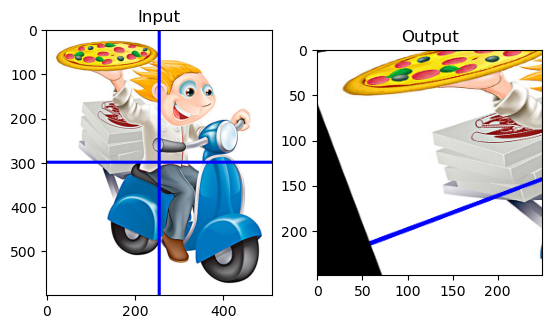

In [26]:
# 定义四个点
# pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
# pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

pts1 = np.float32([[19,11],[225,86],[198,196],[2,102]])
pts2 = np.float32([[10,10],[250,10],[250,240*140/440],[10,240*140/440]])
# M是一个3*3的矩阵
M = cv.getPerspectiveTransform(pts1,pts2)
print(M)
# 计算规则：src(x,y)=dst(m11x+m12y+m13/(m31x+m32y+m33), m21x+m22y+m23/(m31x+m32y+m33))
dst = cv.warpPerspective(img,M,(250,250))

# 可视化画图
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Input')
plt.subplot(122)
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.title('Output')
plt.show()

[[  1.36    0.318 -33.111]
 [ -0.301   0.787  -1.25 ]
 [  0.001   0.      1.   ]]


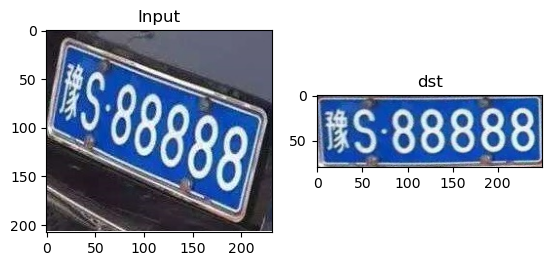

In [27]:
img = cv.imread("car3_plat.jpg")

#练习：正视车牌


# 定义四个点
pts1 = np.float32([[22,10],[226,88],[197,198],[0,104]])
pts2 = np.float32([[0,0],[250,0],[250,80],[0,80]])
# M是一个3*3的矩阵
M = cv.getPerspectiveTransform(pts1,pts2)
print(M)
# 计算规则：src(x,y)=dst(m11x+m12y+m13/(m31x+m32y+m33), m21x+m22y+m23/(m31x+m32y+m33))
dst = cv.warpPerspective(img,M,(250,80))


# 可视化画图
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Input')
plt.subplot(122)
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.title('dst')
plt.show()

# 二值化图像

In [28]:
# 产生一个图像(从白色到黑色的递增的形式)
img = np.arange(255, -1, -1).reshape((1, -1))
for i in range(255):
    img = np.append(img, np.arange(255, -1, -1).reshape((1, -1)), axis=0)
img = img.astype(np.uint8)

In [ ]:
cv.imshow('img', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
help(cv.threshold)

In [ ]:
# 进行普通二值化操作(第一个参数是返回的阈值，第二个参数返回的是二值化之后的图像)
# 普通二值化操作， 将小于等于阈值thresh的设置为0，大于该值的设置为maxval
ret, thresh1 = cv.threshold(src=img, thresh=127, maxval=255, type=cv.THRESH_BINARY)
# 反转的二值化操作， 将小于等于阈值thresh的设置为maxval，大于该值的设置为0
ret, thresh2 = cv.threshold(src=img, thresh=127, maxval=255, type=cv.THRESH_BINARY_INV)
# 截断二值化操作，将小于等于阈值thresh的设置为原始值，大于该值的设置为maxval
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
# 0二值化操作，将小于等于阈值的设置为0，大于该值的设置为原始值
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
# 反转0二值化操作，将小于等于阈值的设置为原始值，大于阈值的设置为0
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i]/255.0,'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [4]:
help(cv.threshold)

Help on built-in function threshold:

threshold(...)
    threshold(src, thresh, maxval, type[, dst]) -> retval, dst
    .   @brief Applies a fixed-level threshold to each array element.
    .   
    .   The function applies fixed-level thresholding to a multiple-channel array. The function is typically
    .   used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
    .   this purpose) or for removing a noise, that is, filtering out pixels with too small or too large
    .   values. There are several types of thresholding supported by the function. They are determined by
    .   type parameter.
    .   
    .   Also, the special values #THRESH_OTSU or #THRESH_TRIANGLE may be combined with one of the
    .   above values. In these cases, the function determines the optimal threshold value using the Otsu's
    .   or Triangle algorithm and uses it instead of the specified thresh.
    .   
    .   @note Currently, the Otsu's and Triangle methods a

In [ ]:
# 进行自适应二值化操作
# 因为二值化操作的时候需要给定一个阈值，但是实际情况下阈值不是特别好给定的。
# 所以可以基于本身的图像数据，根据当前区域的像素值获取适合的阈值对当前区域进行二值化操作
img = cv.imread('xiaoren.png',0)

# 普通二值化操作
ret,th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
# 使用均值的方式产生当前像素点对应的阈值，
# 使用(x,y)像素点邻近的blockSize*blockSize区域的均值寄减去C的值
th2 = cv.adaptiveThreshold(img, maxValue=255, adaptiveMethod=cv.ADAPTIVE_THRESH_MEAN_C,
                           thresholdType=cv.THRESH_BINARY, blockSize=11, C=2)
# 使用高斯分布的方式产生当前像素点对应的阈值
# 使用(x,y)像素点邻近的blockSize*blockSize区域的加权均值寄减去C的值，
# 其中权重为和当前数据有关的高斯随机数
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                           cv.THRESH_BINARY, 11, 2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 图像二值化 + 高斯模糊

In [ ]:
# 产生噪音数据
# img1 = np.random.uniform(low=0, high=255, size=(300,300))
#高斯噪声
img1 = np.random.normal(127, 127, size=(300,300))#第一个127是均值，第二个127是方差
img1 = np.clip(img1, 0, 255) #将值限制在0-255之间
img1 = img1.astype(np.uint8)
# 产生背景图像
img2 = np.zeros((300,300), dtype=np.uint8)
img2[100:200, 100:200] = 255
# 合并两张图像，得到一张图像
img = cv.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)

cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
# 进行大津法二值化操作（其实就是找一个最大基于直方图的最大差异性的阈值点）
# 进行普通二值化操作
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# 进行大津法二值化操作
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# 做一个高斯转换后，再做大津法二值化操作
# 高斯模糊的操作
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# 画图
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding(v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding(v={})".format(ret2),
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding(v={})".format(ret3)]

for i in range(3):
    # 原始图
    plt.subplot(3,3,i*3+1),
    plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), 
    plt.xticks([]), 
    plt.yticks([])
    
    # 直方图
    plt.subplot(3,3,i*3+2),
    plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), 
#     plt.xticks([]), 
    plt.yticks([])
    
    # 二值化后的图
    plt.subplot(3,3,i*3+3),
    plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), 
    plt.xticks([]), 
    plt.yticks([])
plt.show()